# Brief

In this notebook, we conduct a detailed analysis combining cosine similarity of TF-IDF from RTRS audit reports with sentiment analysis using BERT without fine-tuning. To further understand the complex relationships between these two analyses, we explore several advanced correlation methods.

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import pdist, squareform
from scipy import stats
!pip install minepy
from minepy import MINE
import Levenshtein as lev
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
  Created wheel for minepy: filename=minepy-1.2.6-cp310-cp310-linux_x86_64.whl size=60442 sha256=0bb87bfc3e5baa0eafbd16640563a8056c8c41258f20ac0a870ca9c02589aca2
  Stored in directory: /root/.cache/pip/wheels/69/38/a6/825bb9b9ed81e6af43a0ef80c7cfe4cafcfdbc2f5cde2959d9
Successfully built minepy


In [2]:
rtrs_df = pd.read_csv('/kaggle/input/rtrs-brazil-public-audit-reports-2023/brazil_rtrs.csv', encoding = 'iso-8859-14')
prompt_df = pd.read_csv('/kaggle/input/rtrs-brazil-public-audit-reports-2023/prompt_eng_rtrs.csv')

In [3]:
rtrs_df.iloc[:, 12:]

,1_1_criteria,1_2_criteria,1_3_criteria,2_1_criteria,2_2_criteria,2_3_criteria,2_4_criteria,2_5_criteria,3_1_criteria,3_2_criteria,...,5_2_criteria,5_3_criteria,5_4_criteria,5_5_criteria,5_6_criteria,5_7_criteria,5_8_criteria,5_9_criteria,5_10_criteria,5_11_criteria
0,The producer demonstrates knowledge of applica...,The right to use the land was evidenced throug...,"The manager carried out a social, environmenta...",In none of the audited farms was there evidenc...,All employees on the audited farms are registe...,"The audited farm has a PGR, where health and s...",According to reports obtained through intervie...,"Verified from interviews, information collecte...",The farms have e-mail and telephone numbers an...,Verified that there are no cases of disputes r...,...,The farms have complete maps with the location...,Soil quality is preserved on all audited farms...,The four farms do not have a documented Integr...,It was verified that the audited property uses...,The farms do not use any agrochemicals listed ...,Products for biological control are used in th...,It was verified that if an outbreak of new pes...,The farms follow the document Use and Applicat...,Neighboring areas have the same type of produc...,It was verified that the Seeds acquired by far...
1,Producers demonstrated knowledge of applicable...,The right to use the land was evidenced throug...,The group manager carried out a socio-environm...,Through interviews with permanent and temporar...,All workers have employment contracts signed w...,The workers demonstrated in interviews their k...,Through interviews with permanent and temporar...,"Salaries are paid monthly, according to report...",Sign verified on the propertys entrance road c...,The audited properties CondomÃ­nio Milla and B...,...,"As demonstrated through contracts, the CondomÃ...",Soil analyzes are carried out to monitor organ...,The farms do not have documented MIC Â Integr...,The farm planning sector purchases the product...,The farms do not use any agrochemicals listed ...,Verified on the audited farms that the use of ...,According to reports from those responsible fo...,The audited farms have a documented procedure ...,The production system adopted by the farms is ...,Verified that all seeds used on the farms are ...
2,Evidenced through documentary evaluation and i...,Evidenced through documentary evaluation of CA...,"Evidenced through documentary evaluation, the ...",According to visual assessment of signs fixed ...,"According to documentary evaluation, it was ve...",By demonstrating the delivery of PPE and healt...,According to interviews with managers and empl...,According to the documentary evaluation of the...,"According to visual assessment, it was evident...","Not applicable, as there are no indigenous com...",...,"At Fazenda Santa Cruz, there is no use of irri...","Solid analysis carried out in 2021, issued by ...","Evidenced through documentary evaluation, the ...",Evidenced through documentary evaluation that ...,It was evidenced through a documentary evaluat...,Evidenced through documentary evaluation Stand...,There is no evidence of pest outbreaks in the ...,The Standard Operating Procedure - Care with A...,Although it is evidenced through documentary e...,"According to evidence presented, all seeds pur..."
3,The farm remains up to date with applicable la...,The property only has its own areas with regis...,"First year of certification, progress will be ...",Employees are free to leave the farm and have ...,Employees have signed employment contracts att...,Those responsible for the farm demonstrated kn...,No local union maintains contact with the empl...,Although there is no collective agreement or c...,The local community can contact the farm via t...,The farm manager/group manager has maps ident...,...,Verified during visits and on maps that forest...,Soil analyzes are carried out with precision a...,Indicator not applicable for the initial certi...,Records on the use of agrochemic

In [4]:
prompt_df.head(4)

,Criteria,Text,Describe,Reco
0,1.1,All applicable local and national legislation ...,1.1.1 There is demonstrable knowledge of respo...,Guidance 1.1.1 - 1.1.2 Producers need access t...
1,1.2,Land use rights are clearly defined and demons...,1.2.1 Documentary evidence of land use rights ...,NaN
2,1.3,There is continuous improvement against the re...,"1.3.1 From the assessment required in 4.1.1, t...",Guidance 1.3.1 - 1.3.2 - 1.3.3 It is recognize...
3,2.1,"Child labor, forced labor, discrimination and ...","2.1.1 No form of forced, compulsory, bonded, t...",Guideline 2.1 Proof of relevant personal data ...


In [5]:
criteria_columns = [col for col in rtrs_df.columns if 'criteria' in col]
rtrs_train = rtrs_df[criteria_columns]
prompt_descriptions = prompt_df['Describe'].tolist()

In [6]:
lev_results = []

for i in prompt_descriptions:
    col_result = []
    for j in rtrs_train:
        distance = lev.distance(rtrs_train[j], i)
        similarity = (max(len(rtrs_train[j]), len(i)) - distance) / max(len(rtrs_train[j]), len(i))
        col_result.append(similarity)
    lev_results.append(col_result)

In [7]:
lev_results[0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [8]:
pairs_per_column = []
for item_list, column in zip(prompt_descriptions, rtrs_train.columns):
    pairs_column = [(item_list, col_value) for col_value in rtrs_train[column]]
    pairs_per_column.append(pairs_column)

In [9]:
pairs_per_column[0][0]

('1.1.1 There is demonstrable knowledge of responsibilities under applicable laws; 1.1.2 Applicable laws are being complied with; 1.1.3 Producers must not engage in any act of corruption, extortion or embezzlement, or in any form of bribery - including (but not limited to) promising, offering, giving or accepting any undue inducement, whether monetary or otherwise.',
 'The producer demonstrates knowledge of applicable laws and remains up to date through external consultancy from companies and technical professionals. Compliance with applicable laws was verified in most of the farms audited, such as, for example, Receipt of the Rural Environmental Registry, Well Grant, among others.')

In [10]:
def calculate_similarity_cosine(text1, text2):
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf[0:1], tfidf[1:2])[0][0]

results = []

for item_list, column in zip(prompt_descriptions, rtrs_train.columns):
    for col_value in rtrs_train[column]:
        sim_cos = calculate_similarity_cosine(item_list, col_value)
        results.append([item_list, col_value, sim_cos])

df_results = pd.DataFrame(results, columns=['Text_List', 'Text_Column', 'Similarity_Cos'])

In [11]:
df_results

,Text_List,Text_Column,Similarity_Cos
0,1.1.1 There is demonstrable knowledge of respo...,The producer demonstrates knowledge of applica...,0.181577
1,1.1.1 There is demonstrable knowledge of respo...,Producers demonstrated knowledge of applicable...,0.119216
2,1.1.1 There is demonstrable knowledge of respo...,Evidenced through documentary evaluation and i...,0.113839
3,1.1.1 There is demonstrable knowledge of respo...,The farm remains up to date with applicable la...,0.072109
4,1.1.1 There is demonstrable knowledge of respo...,Producers demonstrate knowledge of applicable ...,0.195853
...,...,...,...
3579,5.11.1 All seed purchased must come from known...,The origin of the seeds can be proven through ...,0.061231
3580,5.11.1 All seed purchased must come from known...,The seeds purchased come from legally known so...,0.261090
3581,5.11.1 All seed purchased must come from known...,None of the farms produce their own seeds. The...,0.114873
3582,5.11.1 All seed purchased must come from known...,The farm acquires seeds from legally known sou...,0.192513


In [12]:
dfs_per_col = []

for col in rtrs_train.columns:
    df_col = df_results[df_results['Text_List'] == prompt_descriptions[rtrs_train.columns.get_loc(col)]]
    dfs_per_col.append(df_col)

In [13]:
dfs_per_col[27]

,Text_List,Text_Column,Similarity_Cos
3456,5.11.1 All seed purchased must come from known...,It was verified that the Seeds acquired by far...,0.174153
3457,5.11.1 All seed purchased must come from known...,Verified that all seeds used on the farms are ...,0.201952
3458,5.11.1 All seed purchased must come from known...,"According to evidence presented, all seeds pur...",0.192517
3459,5.11.1 All seed purchased must come from known...,Indicator not applicable for the initial certi...,0.000000
3460,5.11.1 All seed purchased must come from known...,Verified that the seeds acquired by farms are ...,0.151034
...,...,...,...
3579,5.11.1 All seed purchased must come from known...,The origin of the seeds can be proven through ...,0.061231
3580,5.11.1 All seed purchased must come from known...,The seeds purchased come from legally known so...,0.261090
3581,5.11.1 All seed purchased must come from known...,None of the farms produce their own seeds. The...,0.114873
3582,5.11.1 All seed purchased must come from known...,The farm acquires seeds from legally known sou...,0.192513


In [14]:
df_similarities = pd.DataFrame(np.nan, index=range(128), columns=rtrs_train.columns)

for col in rtrs_train.columns:
    values_similarities = df_results[df_results['Text_List'] == prompt_descriptions[rtrs_train.columns.get_loc(col)]]['Similarity_Cos'].values

    if len(values_similarities) < 128:
        values_similarities = np.pad(values_similarities, (0, 128 - len(values_similarities)), 'constant', constant_values=np.nan)
    else:
        values_similarities = values_similarities[:128]

    df_similarities[col] = values_similarities

In [15]:
df_similarities.to_csv('cosine_similarity.csv', index=False)

In [16]:
df_similarities

,1_1_criteria,1_2_criteria,1_3_criteria,2_1_criteria,2_2_criteria,2_3_criteria,2_4_criteria,2_5_criteria,3_1_criteria,3_2_criteria,...,5_2_criteria,5_3_criteria,5_4_criteria,5_5_criteria,5_6_criteria,5_7_criteria,5_8_criteria,5_9_criteria,5_10_criteria,5_11_criteria
0,0.181577,0.097157,0.410213,0.494528,0.437069,0.443980,0.203008,0.525346,0.294100,0.397281,...,0.435377,0.362078,0.520134,0.521830,0.384194,0.255174,0.187037,0.461452,0.238636,0.174153
1,0.119216,0.100700,0.480949,0.568808,0.493256,0.376486,0.252835,0.631653,0.433869,0.343759,...,0.245093,0.502707,0.528031,0.596493,0.279163,0.333497,0.223221,0.357151,0.333847,0.201952
2,0.113839,0.086792,0.295936,0.666541,0.470106,0.502565,0.373536,0.513473,0.455285,0.254748,...,0.215191,0.263330,0.287648,0.386663,0.129259,0.364170,0.309270,0.295026,0.222400,0.192517
3,0.072109,0.108961,0.265825,0.458696,0.343625,0.333742,0.236197,0.608596,0.282918,0.289944,...,0.332240,0.365854,0.188644,0.425685,0.311303,0.088993,0.086511,0.560895,0.000000,0.000000
4,0.195853,0.097157,0.462233,0.491056,0.500835,0.412387,0.198008,0.566669,0.409291,0.413939,...,0.410817,0.387167,0.502172,0.467374,0.384194,0.255174,0.187037,0.342135,0.256279,0.151034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.071985,0.119137,0.405256,0.293528,0.218203,0.393025,0.251169,0.572401,0.411477,0.276336,...,0.313663,0.368473,0.236837,0.386191,0.216624,0.171318,0.164958,0.179549,0.271619,0.061231
124,0.105852,0.102553,0.488334,0.303328,0.458387,0.449276,0.337410,0.364093,0.281650,0.356719,...,0.275580,0.468766,0.208538,0.428526,0.225721,0.449516,0.351706,0.405966,0.273407,0.261090
125,0.199784,0.116744,0.444268,0.487731,0.327254,0.534902,0.381410,0.538933,0.493042,0.377396,...,0.290153,0.396157,0.586233,0.560627,0.236886,0.414830,0.229903,0.320108,0.326781,0.114873
126,0.146252,0.084971,0.469844,0.540491,0.466557,0.560175,0.202892,0.686158,0.348654,0.261467,...,0.477366,0.393596,0.543702,0.543340,0.271560,0.391046,0.169794,0.321268,0.341206,0.192513


## EDA

In [17]:
df_similarities.describe()

,1_1_criteria,1_2_criteria,1_3_criteria,2_1_criteria,2_2_criteria,2_3_criteria,2_4_criteria,2_5_criteria,3_1_criteria,3_2_criteria,...,5_2_criteria,5_3_criteria,5_4_criteria,5_5_criteria,5_6_criteria,5_7_criteria,5_8_criteria,5_9_criteria,5_10_criteria,5_11_criteria
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,0.119763,0.119065,0.419735,0.432314,0.431884,0.451541,0.326409,0.466434,0.360045,0.353748,...,0.317337,0.382002,0.387024,0.475834,0.252168,0.357360,0.322956,0.332346,0.289860,0.160312
std,0.041019,0.041723,0.097516,0.120572,0.120904,0.060712,0.090383,0.126671,0.081239,0.089048,...,0.088122,0.051146,0.116338,0.137449,0.063449,0.111156,0.112163,0.125347,0.068871,0.069222
min,0.020467,0.029704,0.176217,0.199761,0.057387,0.244628,0.077257,0.218282,0.141507,0.000000,...,0.043854,0.162904,0.146714,0.019607,0.112579,0.088993,0.086511,0.170440,0.000000,0.000000
25%,0.094746,0.097157,0.358143,0.320964,0.371587,0.412194,0.249893,0.378857,0.292711,0.292048,...,0.273645,0.365046,0.307113,0.400476,0.211123,0.298007,0.196001,0.212353,0.267014,0.111934
50%,0.119824,0.106194,0.440684,0.473798,0.469787,0.454193,0.334139,0.460215,0.358989,0.359162,...,0.310177,0.387167,0.397651,0.487730,0.258368,0.321900,0.348206,0.320108,0.271619,0.152809
75%,0.140985,0.146303,0.489479,0.499215,0.501256,0.472563,0.375505,0.571878,0.409280,0.418822,...,0.379328,0.407711,0.458614,0.567949,0.280129,0.464952,0.409820,0.415589,0.319653,0.213712
max,0.245397,0.294111,0.619126,0.701858,0.656991,0.644045,0.516913,0.691894,0.525399,0.560201,...,0.481527,0.510135,0.637257,0.755086,0.432266,0.549926,0.587603,0.622440,0.634609,0.265019


In [18]:
df_similarities.isnull().sum()

1_1_criteria     0
1_2_criteria     0
1_3_criteria     0
2_1_criteria     0
2_2_criteria     0
2_3_criteria     0
2_4_criteria     0
2_5_criteria     0
3_1_criteria     0
3_2_criteria     0
3_3_criteria     0
3_4_criteria     0
4_1_criteria     0
4_2_criteria     0
4_3_criteria     0
4_4_criteria     0
4_5_criteria     0
5_1_criteria     0
5_2_criteria     0
5_3_criteria     0
5_4_criteria     0
5_5_criteria     0
5_6_criteria     0
5_7_criteria     0
5_8_criteria     0
5_9_criteria     0
5_10_criteria    0
5_11_criteria    0
dtype: int64

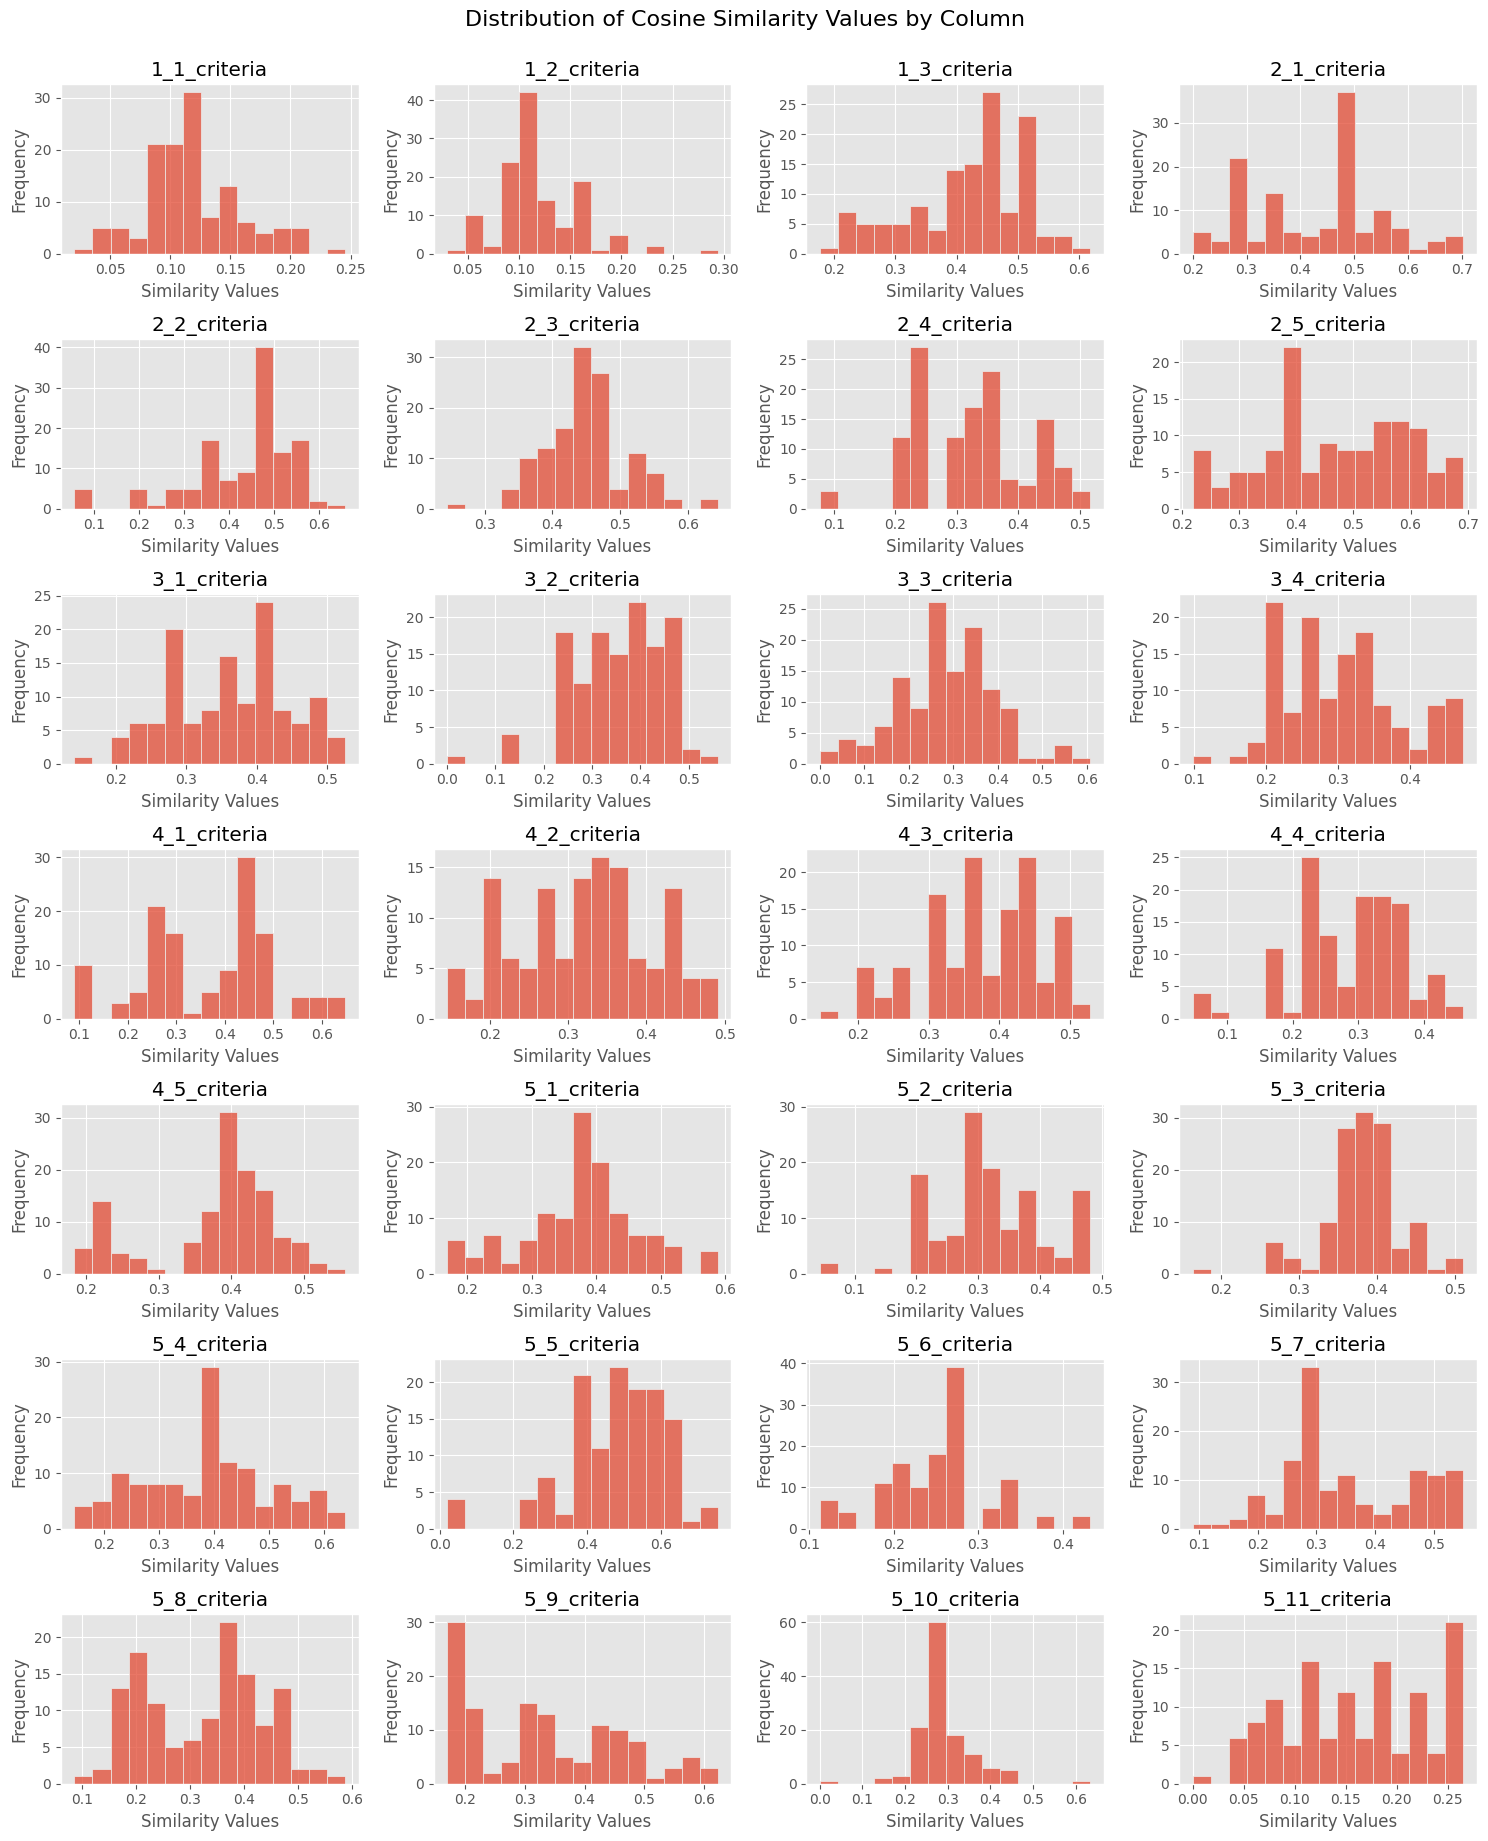

In [19]:
plt.style.use('ggplot')

n_rows = 7
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 18))

axes_flat = axes.flatten()

for i, coluna in enumerate(df_similarities.columns):
    sns.histplot(df_similarities[coluna], bins=15, kde=False, ax=axes_flat[i])
    axes_flat[i].set_title(coluna)
    axes_flat[i].set_xlabel('Similarity Values')
    axes_flat[i].set_ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution of Cosine Similarity Values by Column', fontsize=16, y=1.02)
plt.show()

/tmp/ipykernel_19/3612315162.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


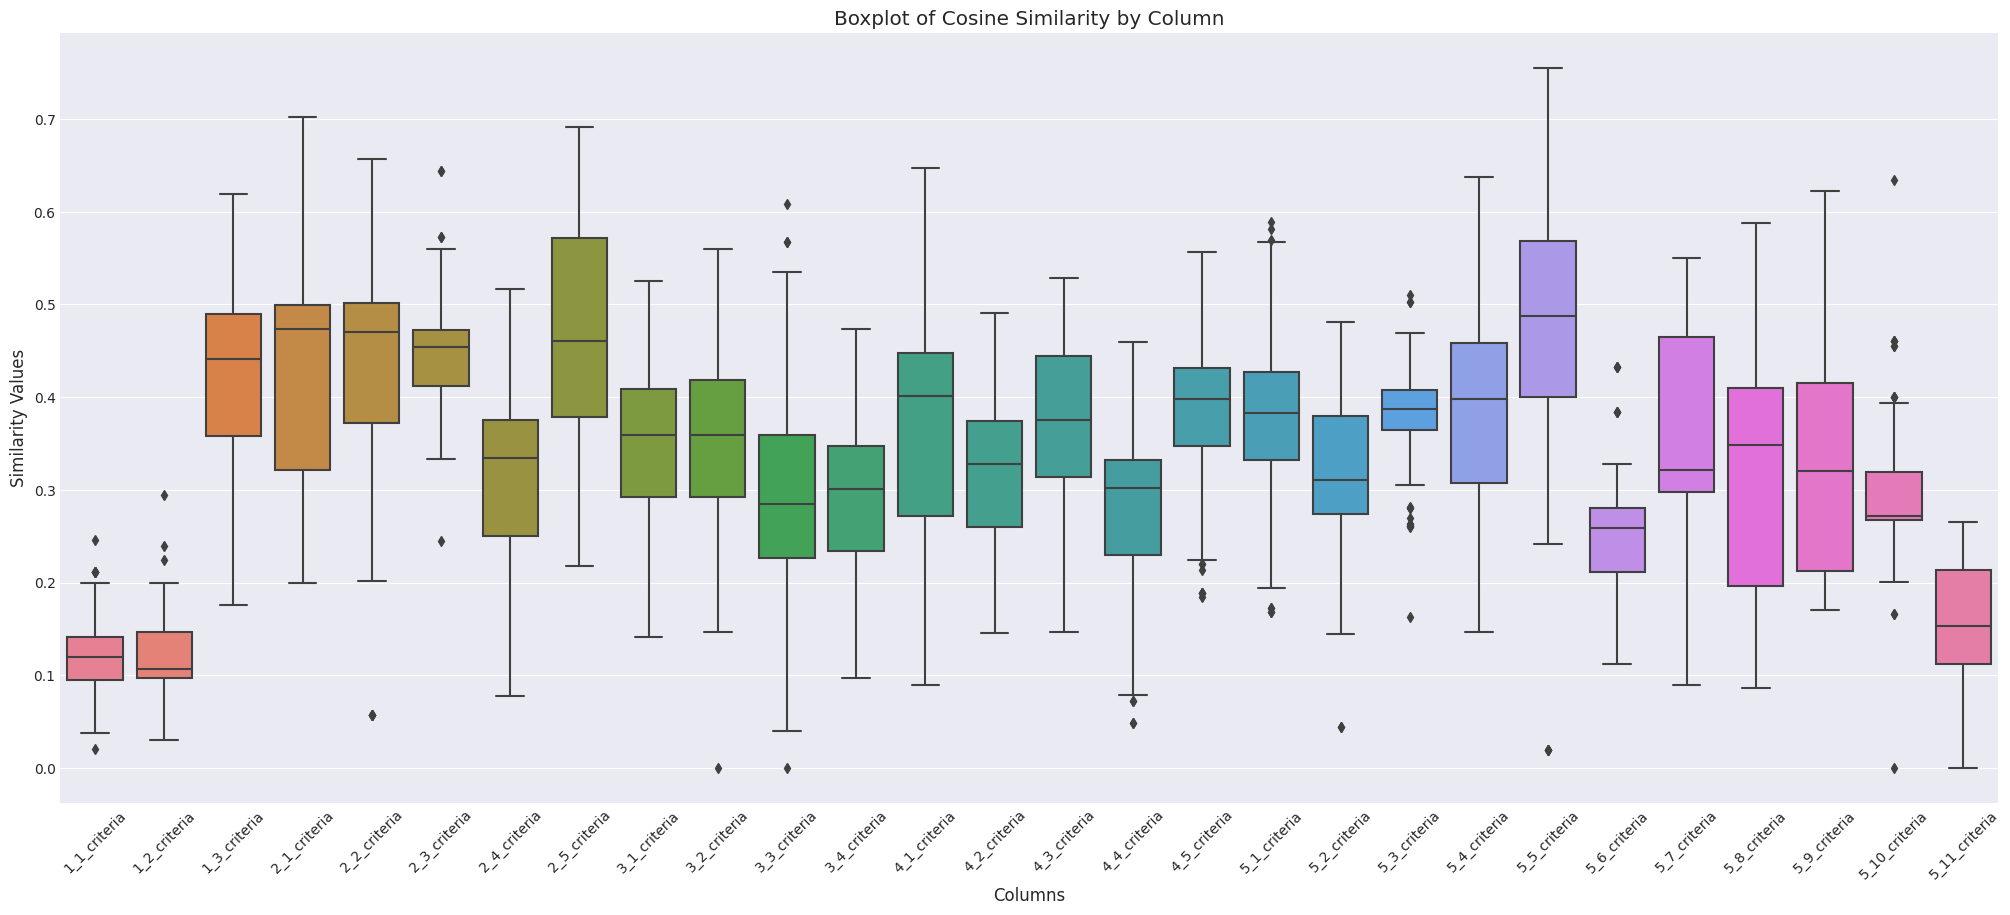

In [20]:
plt.style.use('seaborn-darkgrid')  

plt.figure(figsize=(25, 10))
sns.boxplot(data=df_similarities, palette="husl")  

plt.title('Boxplot of Cosine Similarity by Column')
plt.ylabel('Similarity Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)  
plt.show()

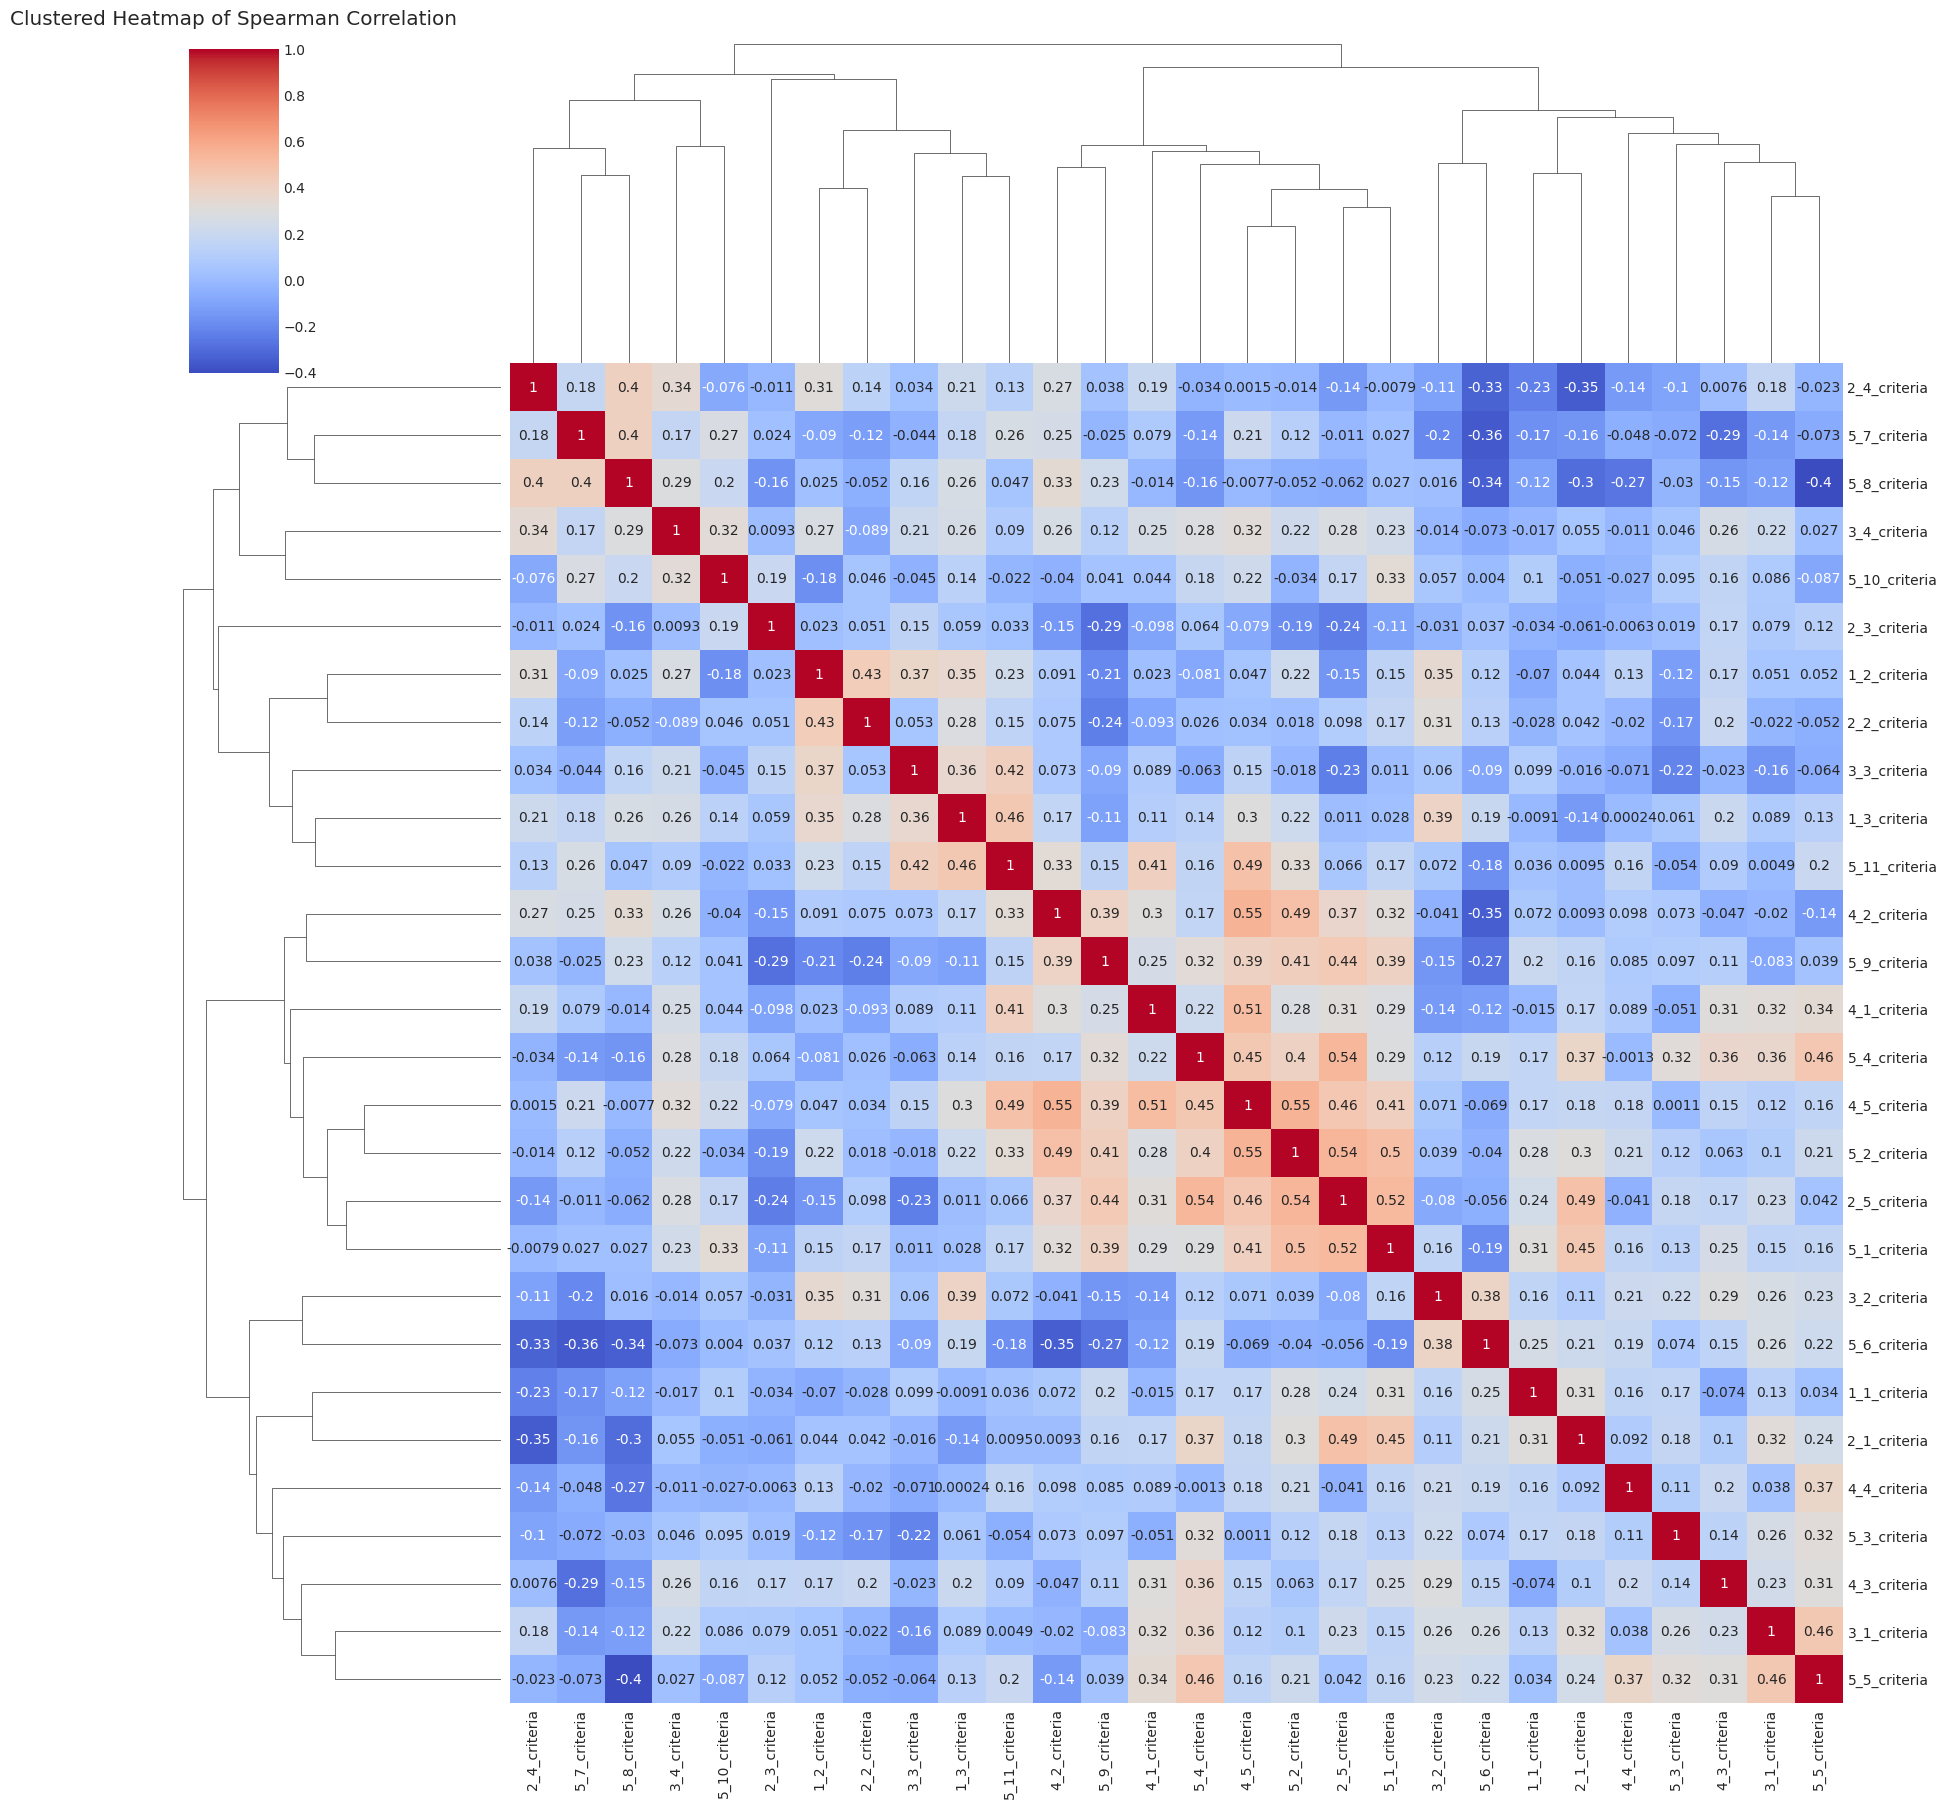

In [21]:
corr = df_similarities.corr(method='spearman')

sns.clustermap(corr, method='average', cmap='coolwarm', figsize=(18, 18), annot=True)

plt.title('Clustered Heatmap of Spearman Correlation', y=1.05)
plt.show()

## Score by similarity

The score is precisely a mark where, in this situation, each company obtains the highest degree of similarity between the prompt (soy standard) and the audit observations made. In other words, it's the mean of similarities.

In [22]:
df_similarities['score_similar'] = df_similarities.mean(axis=1)

In [23]:
df_similarities['score_similar']

0      0.320308
1      0.358547
2      0.324743
3      0.281748
4      0.339665
         ...   
123    0.270882
124    0.315214
125    0.368013
126    0.365371
127    0.344302
Name: score_similar, Length: 128, dtype: float64

In [24]:
describe_stats = df_similarities['score_similar'].describe()

shapiro_test = stats.shapiro(df_similarities['score_similar'])

describe_stats, shapiro_test

(count    128.000000
 mean       0.337528
 std        0.036298
 min        0.248202
 25%        0.316771
 50%        0.343251
 75%        0.357685
 max        0.427356
 Name: score_similar, dtype: float64,
 ShapiroResult(statistic=0.9631108641624451, pvalue=0.0014840865042060614))

The high p-value of 0.700870 suggests that we cannot reject the null hypothesis of normality for the distribution of score_similar. In other words, this implies that the data does not significantly deviate from a normal distribution

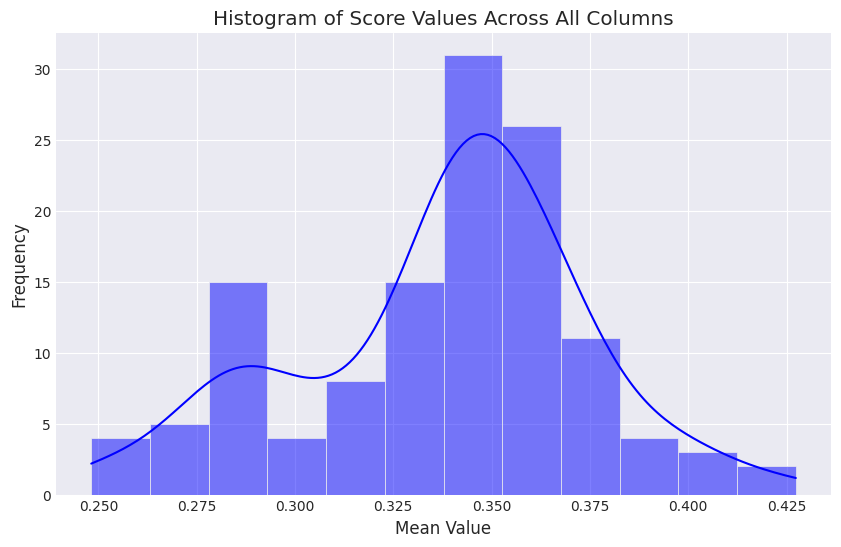

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df_similarities['score_similar'], kde=True, color='blue')
plt.title('Histogram of Score Values Across All Columns')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.show()

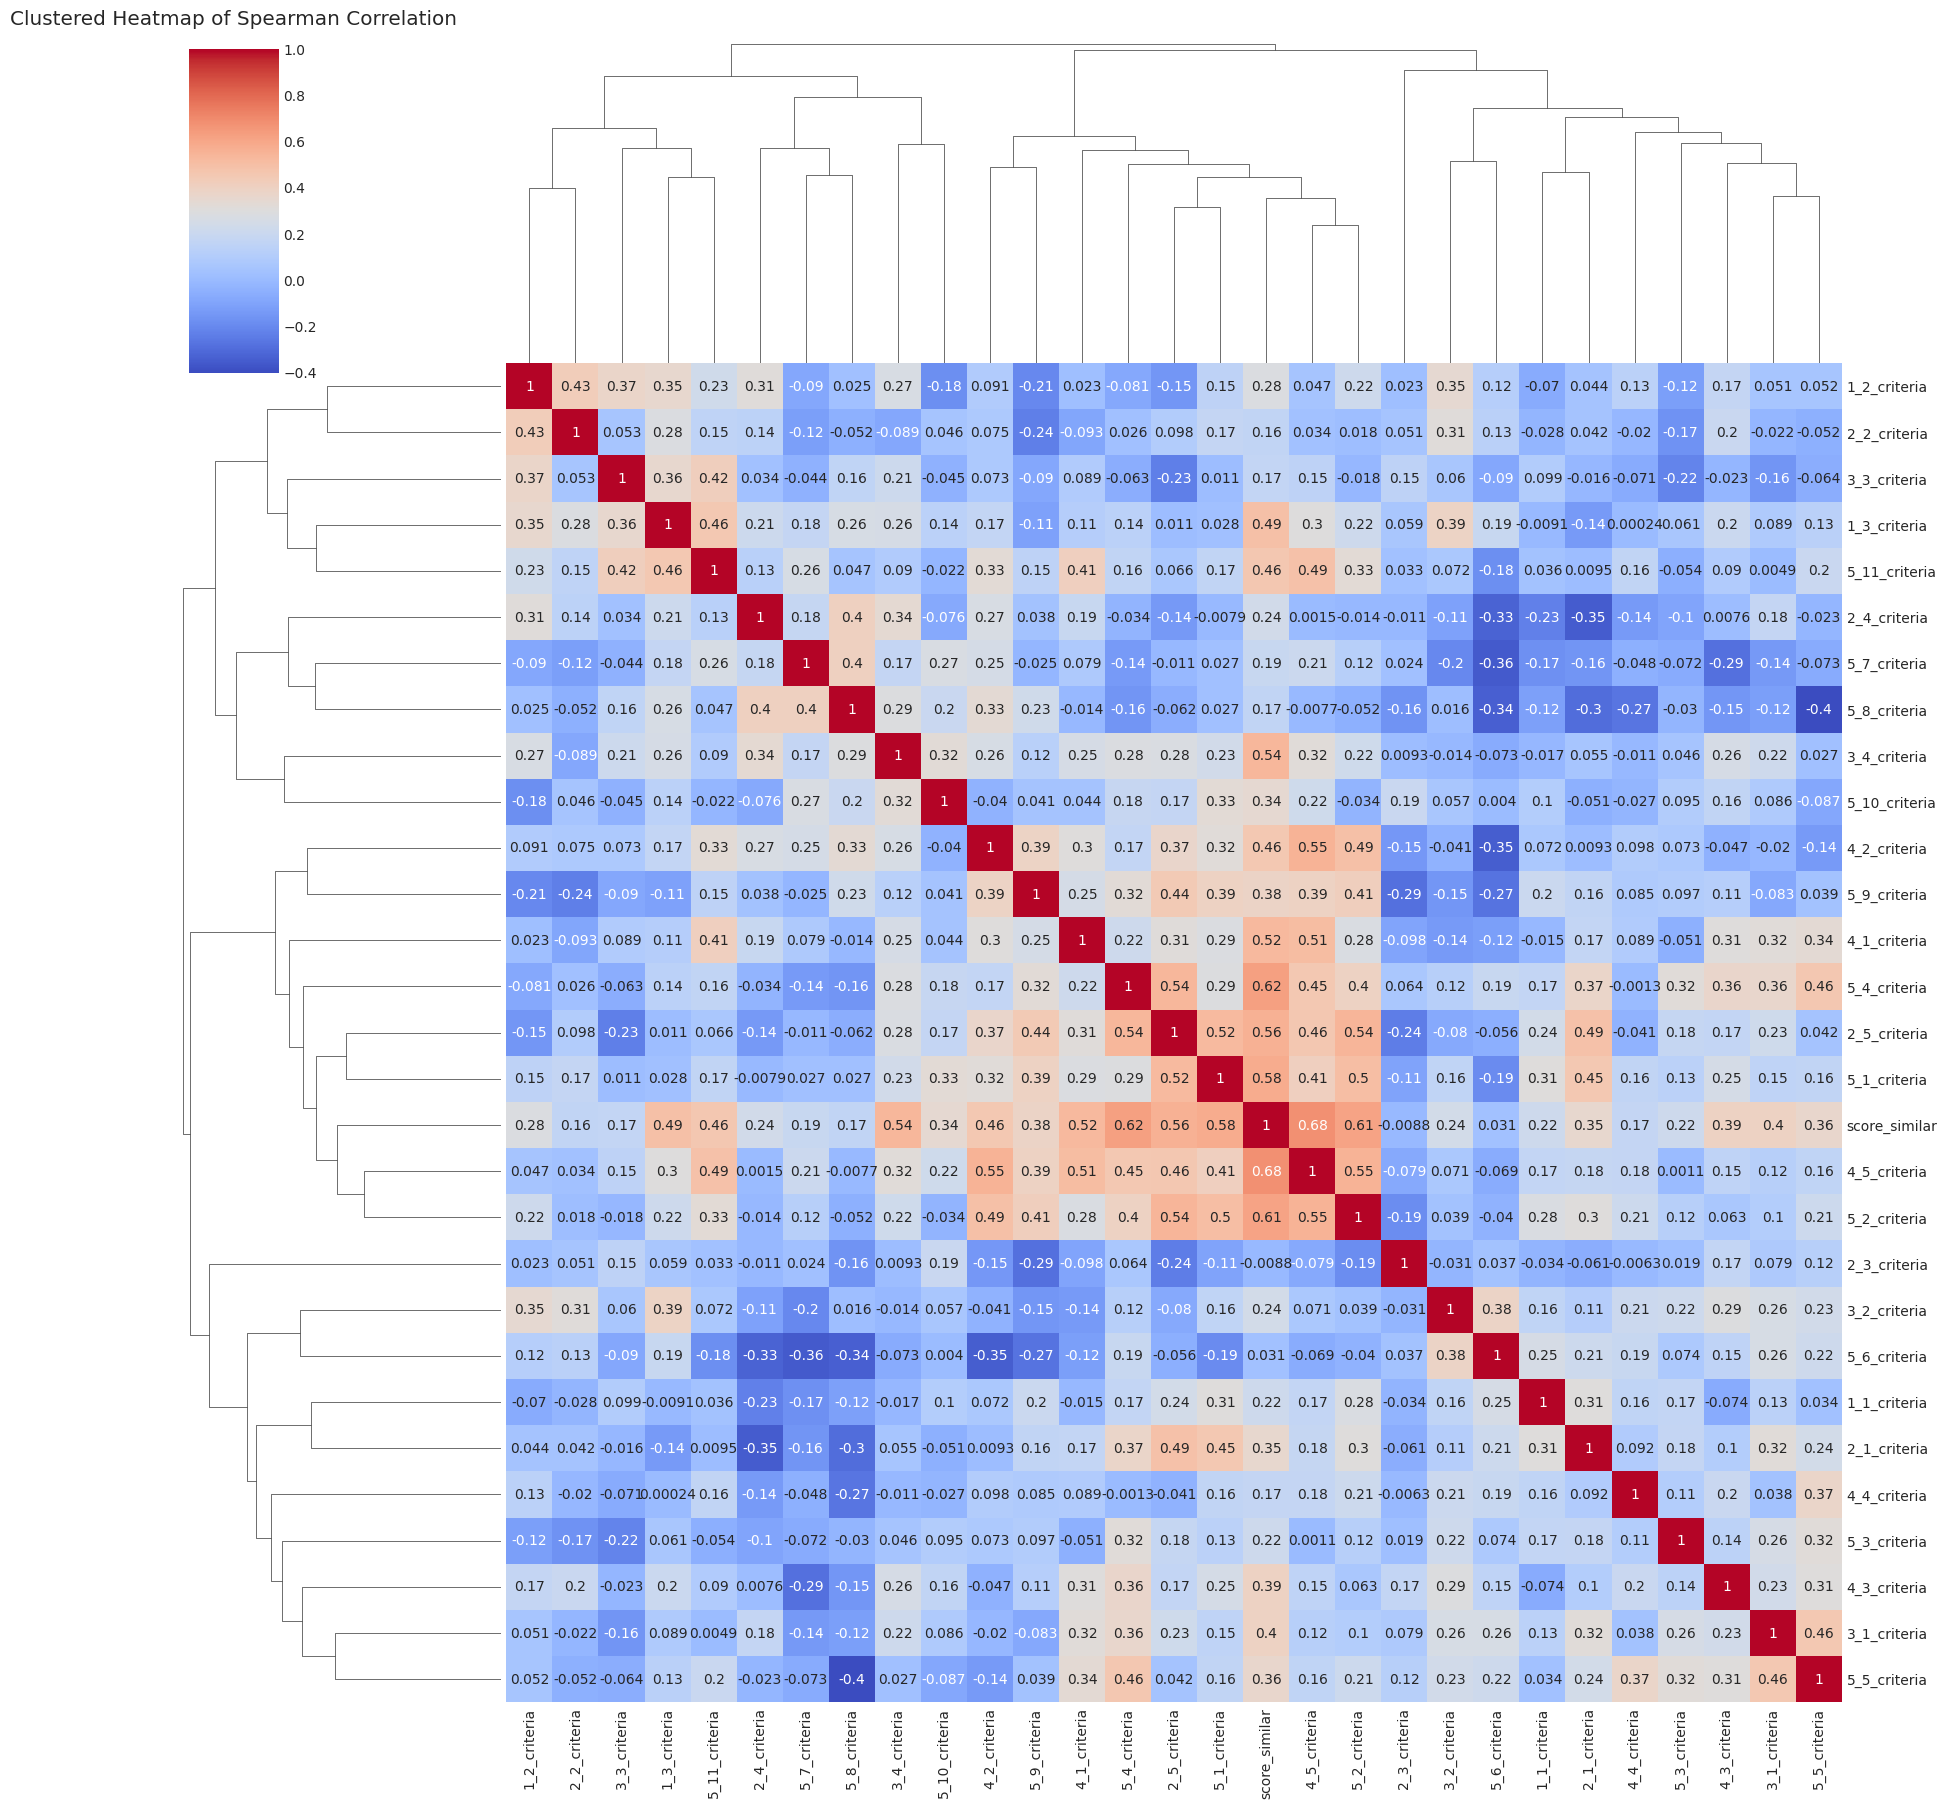

In [26]:
corr = df_similarities.corr(method='spearman')

sns.clustermap(corr, method='average', cmap='coolwarm', figsize=(18, 18), annot=True)

plt.title('Clustered Heatmap of Spearman Correlation', y=1.05)
plt.show()

In [27]:
rtrs_df.iloc[:, 12:] = df_similarities.copy(deep=True)

In [28]:
rtrs_df.to_csv('cosine_similarity.csv')

## Check the corr between Sentiment and Similarity

In [29]:
rtrs_sentiment = pd.read_csv('/kaggle/input/rtrs-brazil-public-audit-reports-2023/brazil_rtrs_sentiment_analysis.csv')
df_sentiment = rtrs_sentiment.iloc[:, 13:].copy(deep=True)

In [30]:
df_sentiment.shape, df_similarities.shape

((128, 31), (128, 29))

In [31]:
rtrs_sentiment.columns

Index(['Unnamed: 0', 'Organization', 'Names', 'Year', 'Links', 'RegTag',
       'Companies', 'Total_Production', 'Issue_Date', 'Expiration_Date',
       'Total_Farm_Area', 'n_members', 'Type', '1_1_criteria', '1_2_criteria',
       '1_3_criteria', '2_1_criteria', '2_2_criteria', '2_3_criteria',
       '2_4_criteria', '2_5_criteria', '3_1_criteria', '3_2_criteria',
       '3_3_criteria', '3_4_criteria', '4_1_criteria', '4_2_criteria',
       '4_3_criteria', '4_4_criteria', '4_5_criteria', '5_1_criteria',
       '5_2_criteria', '5_3_criteria', '5_4_criteria', '5_5_criteria',
       '5_6_criteria', '5_7_criteria', '5_8_criteria', '5_9_criteria',
       '5_10_criteria', '5_11_criteria', 'score_per_enterprise', 'Yield',
       'cluster'],
      dtype='object')

In [32]:
df_sentiment['Name'] = rtrs_sentiment['Names'].copy(deep=True)
df_similarities['Name'] = rtrs_sentiment['Names'].copy(deep=True)

In [33]:
sentiment_columns = {col: 'sent_' + col for col in df_sentiment.columns if col != 'Name'}
df_sentiment.rename(columns=sentiment_columns, inplace=True)

In [34]:
similarity_columns = {col: 'sim_' + col for col in df_similarities.columns if col != 'Name'}
df_similarities.rename(columns=similarity_columns, inplace=True)

In [35]:
df_merge = pd.merge(df_sentiment, df_similarities, on='Name', how='inner')

In [36]:
df_merge.columns

Index(['sent_1_1_criteria', 'sent_1_2_criteria', 'sent_1_3_criteria',
       'sent_2_1_criteria', 'sent_2_2_criteria', 'sent_2_3_criteria',
       'sent_2_4_criteria', 'sent_2_5_criteria', 'sent_3_1_criteria',
       'sent_3_2_criteria', 'sent_3_3_criteria', 'sent_3_4_criteria',
       'sent_4_1_criteria', 'sent_4_2_criteria', 'sent_4_3_criteria',
       'sent_4_4_criteria', 'sent_4_5_criteria', 'sent_5_1_criteria',
       'sent_5_2_criteria', 'sent_5_3_criteria', 'sent_5_4_criteria',
       'sent_5_5_criteria', 'sent_5_6_criteria', 'sent_5_7_criteria',
       'sent_5_8_criteria', 'sent_5_9_criteria', 'sent_5_10_criteria',
       'sent_5_11_criteria', 'sent_score_per_enterprise', 'sent_Yield',
       'sent_cluster', 'Name', 'sim_1_1_criteria', 'sim_1_2_criteria',
       'sim_1_3_criteria', 'sim_2_1_criteria', 'sim_2_2_criteria',
       'sim_2_3_criteria', 'sim_2_4_criteria', 'sim_2_5_criteria',
       'sim_3_1_criteria', 'sim_3_2_criteria', 'sim_3_3_criteria',
       'sim_3_4_criteria'

In [37]:
scaler = MinMaxScaler()

sent_columns = [col for col in df_merge.columns if col.startswith('sent_')]
df_merge[sent_columns] = scaler.fit_transform(df_merge[sent_columns])

sim_columns = [col for col in df_merge.columns if col.startswith('sim_')]
df_merge[sim_columns] = scaler.fit_transform(df_merge[sim_columns])

In [38]:
df_merge.head(5)

,sent_1_1_criteria,sent_1_2_criteria,sent_1_3_criteria,sent_2_1_criteria,sent_2_2_criteria,sent_2_3_criteria,sent_2_4_criteria,sent_2_5_criteria,sent_3_1_criteria,sent_3_2_criteria,...,sim_5_3_criteria,sim_5_4_criteria,sim_5_5_criteria,sim_5_6_criteria,sim_5_7_criteria,sim_5_8_criteria,sim_5_9_criteria,sim_5_10_criteria,sim_5_11_criteria,sim_score_similar
0,0.75,1.00,0.75,0.0,1.00,0.75,1.00,0.0,1.00,0.0,...,0.573608,0.761238,0.682852,0.849626,0.360531,0.200614,0.643832,0.376036,0.657136,0.402479
1,0.25,0.75,0.75,0.0,0.75,0.50,0.00,0.0,0.00,0.0,...,0.978607,0.777336,0.784369,0.521084,0.530455,0.272824,0.413077,0.526068,0.762030,0.615924
2,0.75,0.75,0.75,0.0,0.00,0.75,0.25,0.0,0.75,0.0,...,0.289222,0.287302,0.499071,0.052176,0.596999,0.444547,0.275634,0.350452,0.726428,0.427234
3,0.75,0.75,0.75,0.0,0.00,0.75,0.25,0.0,0.75,0.0,...,0.289222,0.287302,0.499071,0.052176,0.596999,0.444547,0.269195,0.346078,0.726428,0.392142
4,0.75,0.75,0.75,0.0,0.00,0.75,0.25,0.0,0.75,0.0,...,0.289222,0.287302,0.499071,0.052176,0.596999,0.444547,0.275634,0.350452,0.726428,0.427234


## Kendall Correlation

**Kendall's Tau**: Kendall's Tau is a measure of rank correlation, assessing the ordinal association between two quantities. It's defined as:
  $$
  \tau = \frac{2}{n(n-1)} \sum_{i < j} \text{sgn}(x_i - x_j) \cdot \text{sgn}(y_i - y_j)
  $$
  where `sgn` is the sign function, and $x_i, x_j$ and $y_i, y_j$ are the ranks of the $i^{th}$ and $j^{th}$ elements of the datasets $x$ and $y$, respectively.


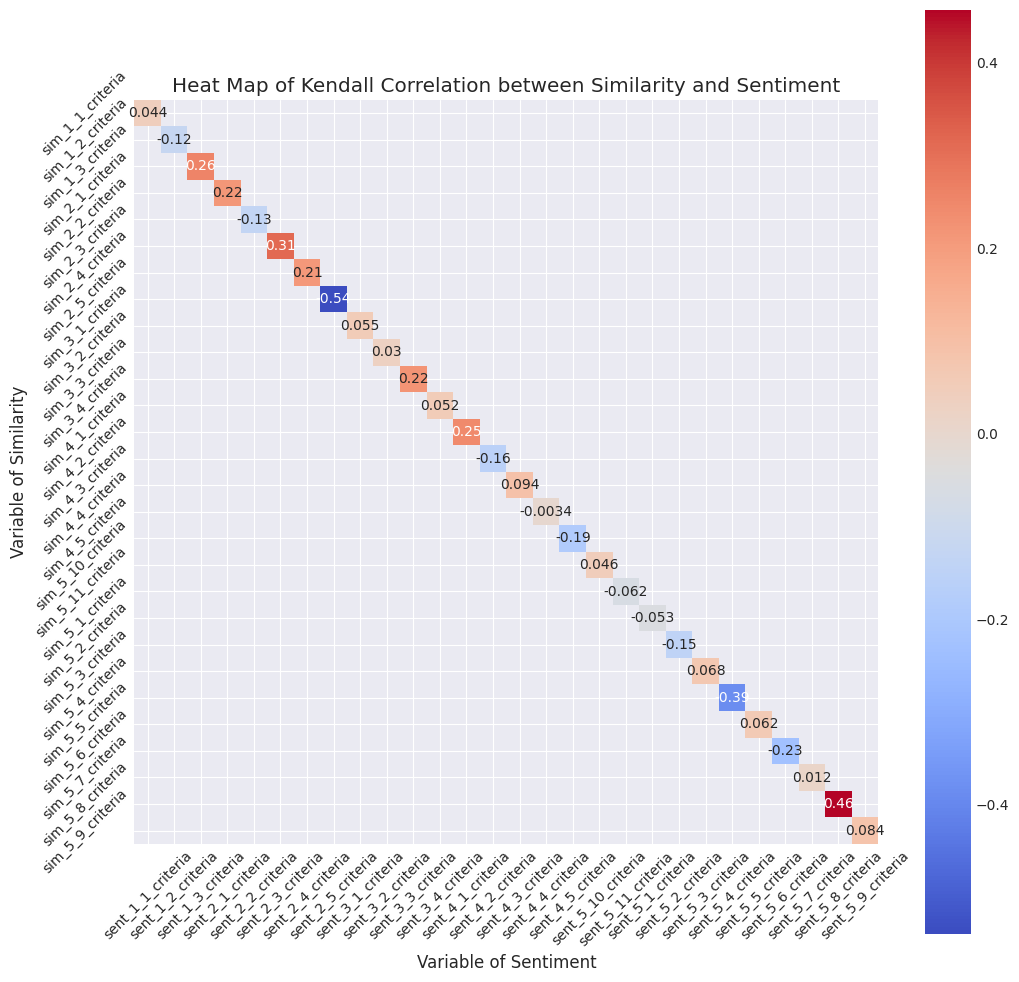

In [39]:
correlations = []

for col in df_merge.columns:
    if col.startswith('sim_'):
        col_sentiment = col.replace('sim_', 'sent_')
        if col_sentiment in df_merge.columns:
            corr = df_merge[col].corr(df_merge[col_sentiment], method='kendall')
            correlations.append([col, col_sentiment, corr])

df_correlations = pd.DataFrame(correlations, columns=['Variable of Similarity', 'Variable of Sentiment', 'Correlation'])

df_correlacoes_pivot = df_correlations.pivot(index='Variable of Similarity', columns='Variable of Sentiment', values='Correlation')

# Criando o mapa of calor
plt.figure(figsize=(12, 12))
sns.heatmap(df_correlacoes_pivot, annot=True, cmap='coolwarm', square=True)
plt.title('Heat Map of Kendall Correlation between Similarity and Sentiment')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Distance Correlation

**Distance Correlation**: This method assesses both linear and non-linear relationships. The distance correlation between two random vectors $X$ and $Y$ is:
  $$
  \text{dCor}(X, Y) = \frac{\text{dCov}(X, Y)}{\sqrt{\text{dVar}(X) \cdot \text{dVar}(Y)}}
  $$
  where $\text{dCov}$ represents the distance covariance, and $\text{dVar}$ is the distance variance.


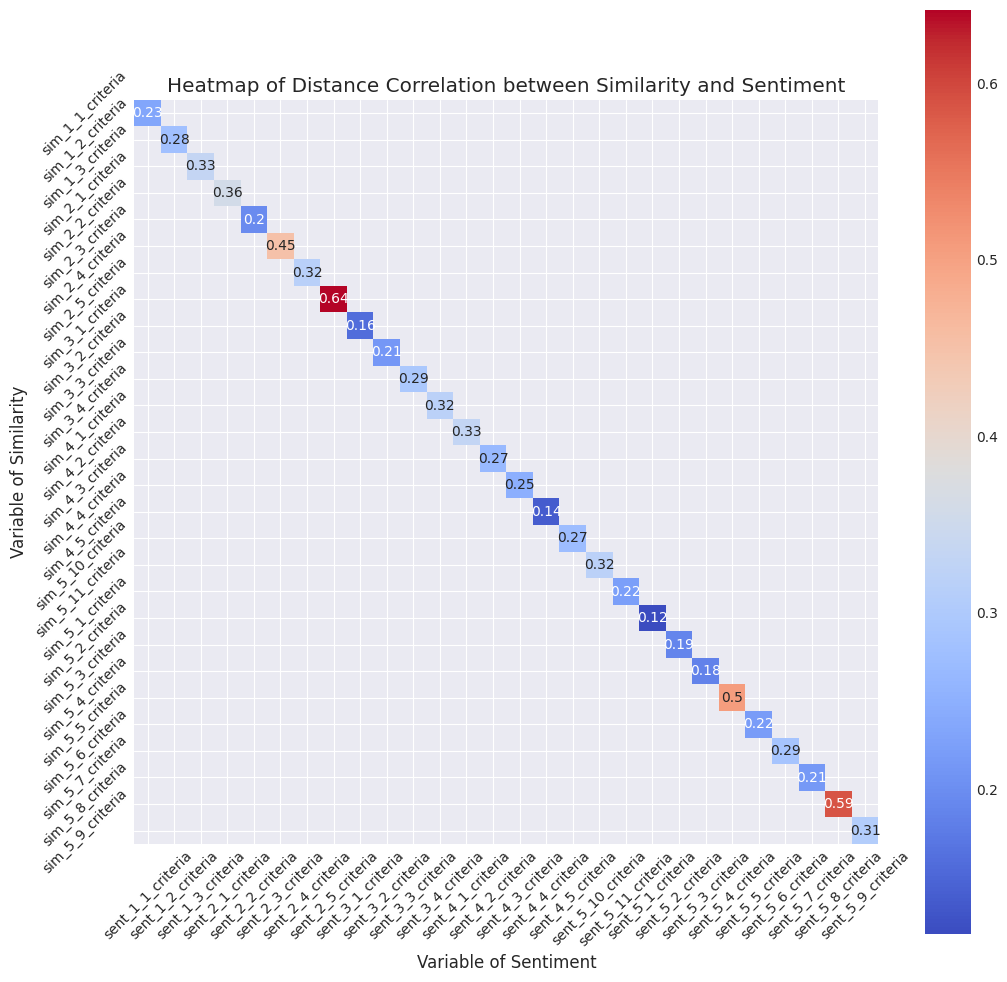

In [40]:
def distance_corr(var_1, var_2):
    x = np.array(var_1)
    y = np.array(var_2)

    distx = pdist(x[:, None], metric='euclidean')
    disty = pdist(y[:, None], metric='euclidean')
    distx = squareform(distx)
    disty = squareform(disty)

    meanx = distx.mean(axis=1)
    meany = disty.mean(axis=1)
    meanxy = distx.mean()

    A = distx - meanx[:, None] - meanx[None, :] + meanxy
    B = disty - meany[:, None] - meany[None, :] + meanxy

    dcov2_xy = (A * B).sum() / float(x.shape[0] ** 2)
    dcov2_xx = (A * A).sum() / float(x.shape[0] ** 2)
    dcov2_yy = (B * B).sum() / float(x.shape[0] ** 2)

    dcor = np.sqrt(dcov2_xy) / np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor

correlations = []

for col in df_merge.columns:
    if col.startswith('sim_'):
        col_sentiment = col.replace('sim_', 'sent_')
        if col_sentiment in df_merge.columns:
            corr = distance_corr(df_merge[col], df_merge[col_sentiment])
            correlations.append([col, col_sentiment, corr])

df_correlations = pd.DataFrame(correlations, columns=['Variable of Similarity', 'Variable of Sentiment', 'Correlation'])

# Reformatando o DataFrame para o mapa de calor
df_correlations_pivot = df_correlations.pivot(index='Variable of Similarity', columns='Variable of Sentiment', values='Correlation')

# Criando o mapa of calor
plt.figure(figsize=(12, 12))
sns.heatmap(df_correlations_pivot, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Distance Correlation between Similarity and Sentiment')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## MIC

**MIC (Maximal Information Coefficient)**: MIC is a technique used to capture a wide range of associations and is defined based on mutual information:
  $$
  \text{MIC}(X, Y) = \max_{xy \leq B(n)} \left(\frac{I(X, Y)}{\log(\min(x, y))}\right)
  $$
  where $I(X, Y)$ is the mutual information of $X$ and $Y$, $x$ and $y$ are the number of bins in the respective histograms of $X$ and $Y$, and $B(n)$ is a function of the sample size $n$.


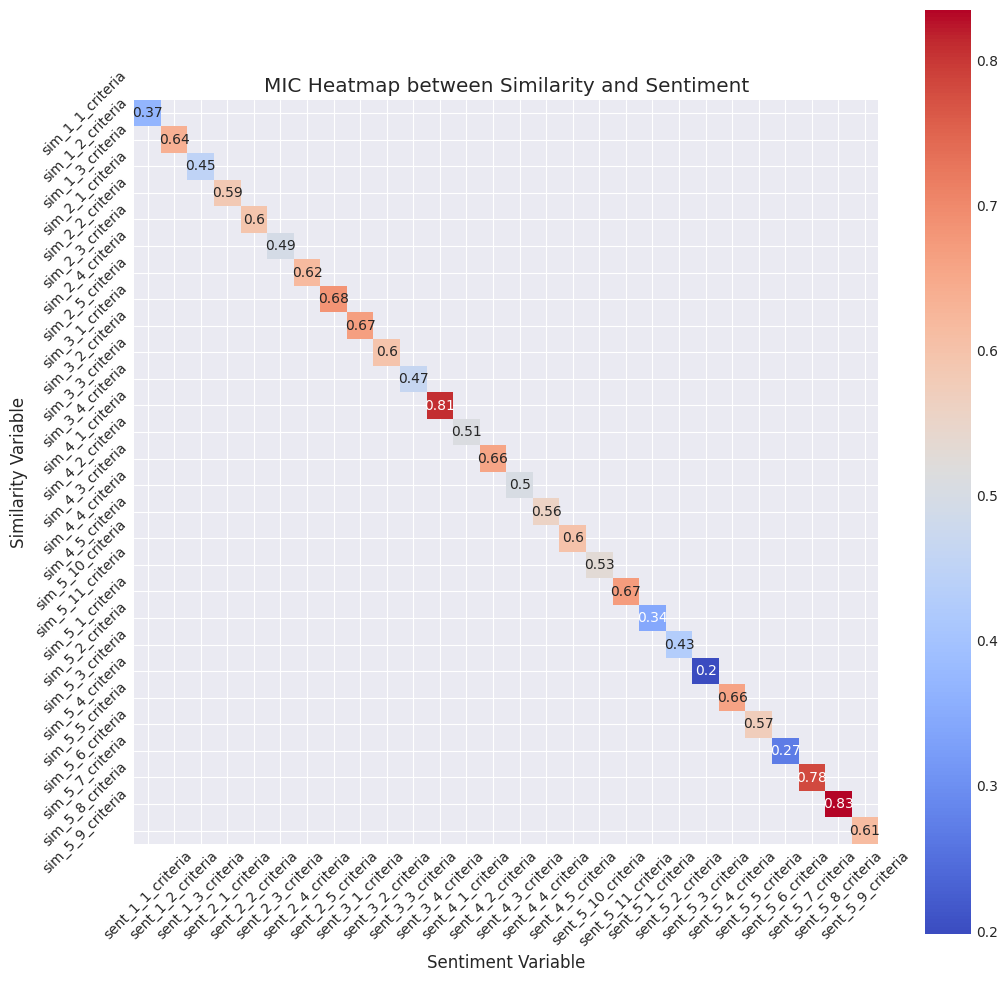

In [41]:
def calculate_mic(x, y):
    mine = MINE(alpha=0.6, c=15)
    mine.compute_score(x, y)
    return mine.mic()

correlations_mic = []

for col in df_merge.columns:
    if col.startswith('sim_'):
        col_sentiment = col.replace('sim_', 'sent_')
        if col_sentiment in df_merge.columns:
            mic_value = calculate_mic(df_merge[col], df_merge[col_sentiment])
            correlations_mic.append([col, col_sentiment, mic_value])

# Criando um DataFrame com as correlações MIC
df_correlations_mic = pd.DataFrame(correlations_mic, columns=['Similarity Variable', 'Sentiment Variable', 'MIC'])

# Reformatando o DataFrame para o mapa de calor
df_correlations_mic_pivot = df_correlations_mic.pivot(index='Similarity Variable', columns='Sentiment Variable', values='MIC')

# Criando o mapa de calor
plt.figure(figsize=(12, 12))
sns.heatmap(df_correlations_mic_pivot, annot=True, cmap='coolwarm', square=True)
plt.title('MIC Heatmap between Similarity and Sentiment')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Hoeffding

**Hoeffding's D Test**: Hoeffding's D is a non-parametric test for independence, especially useful for identifying complex relationships. Its statistic $D$ is computed as:
  $$
  D = \frac{1}{n(n-1)} \sum_{i < j} (Q_{ij} - K_{ij}^x K_{ij}^y)
  $$
  where $Q_{ij} = 1$ if $x_i < x_j$ and $y_i < y_j$ or $x_i > x_j$ and $y_i > y_j$, and $0$ otherwise, and $K_{ij}^x$ and $K_{ij}^y$ are the fractions of $x$ and $y$ values less than $x_i$ and $y_i$, respectively.


In [42]:
def hoeffdings_d(x, y):
    n = len(x)
    x_rank = np.argsort(x)
    y_rank = np.argsort(y)
    
    sum_d = 0
    for i in range(n):
        for j in range(n):
            rank_diff = (x_rank[i] - x_rank[j]) - (y_rank[i] - y_rank[j])
            sum_d += rank_diff ** 2
    
    d = (1 / (n * (n - 1))) * sum_d
    return 30 * d / (n**2 * (n - 1)**2)

correlations_hoeffding = []

for col in df_merge.columns:
    if col.startswith('sim_'):
        col_sentiment = col.replace('sim_', 'sent_')
        if col_sentiment in df_merge.columns:
            d_value = hoeffdings_d(df_merge[col].values, df_merge[col_sentiment].values)
            correlations_hoeffding.append([col, col_sentiment, d_value])

df_correlations_hoeffding = pd.DataFrame(correlations_hoeffding, columns=['Similarity Variable', 'Sentiment Variable', 'Hoeffding_D'])

df_correlations_hoeffding.head()

,Similarity Variable,Sentiment Variable,Hoeffding_D
0,sim_1_1_criteria,sent_1_1_criteria,0.000211
1,sim_1_2_criteria,sent_1_2_criteria,0.000189
2,sim_1_3_criteria,sent_1_3_criteria,0.000187
3,sim_2_1_criteria,sent_2_1_criteria,0.000154
4,sim_2_2_criteria,sent_2_2_criteria,0.000202


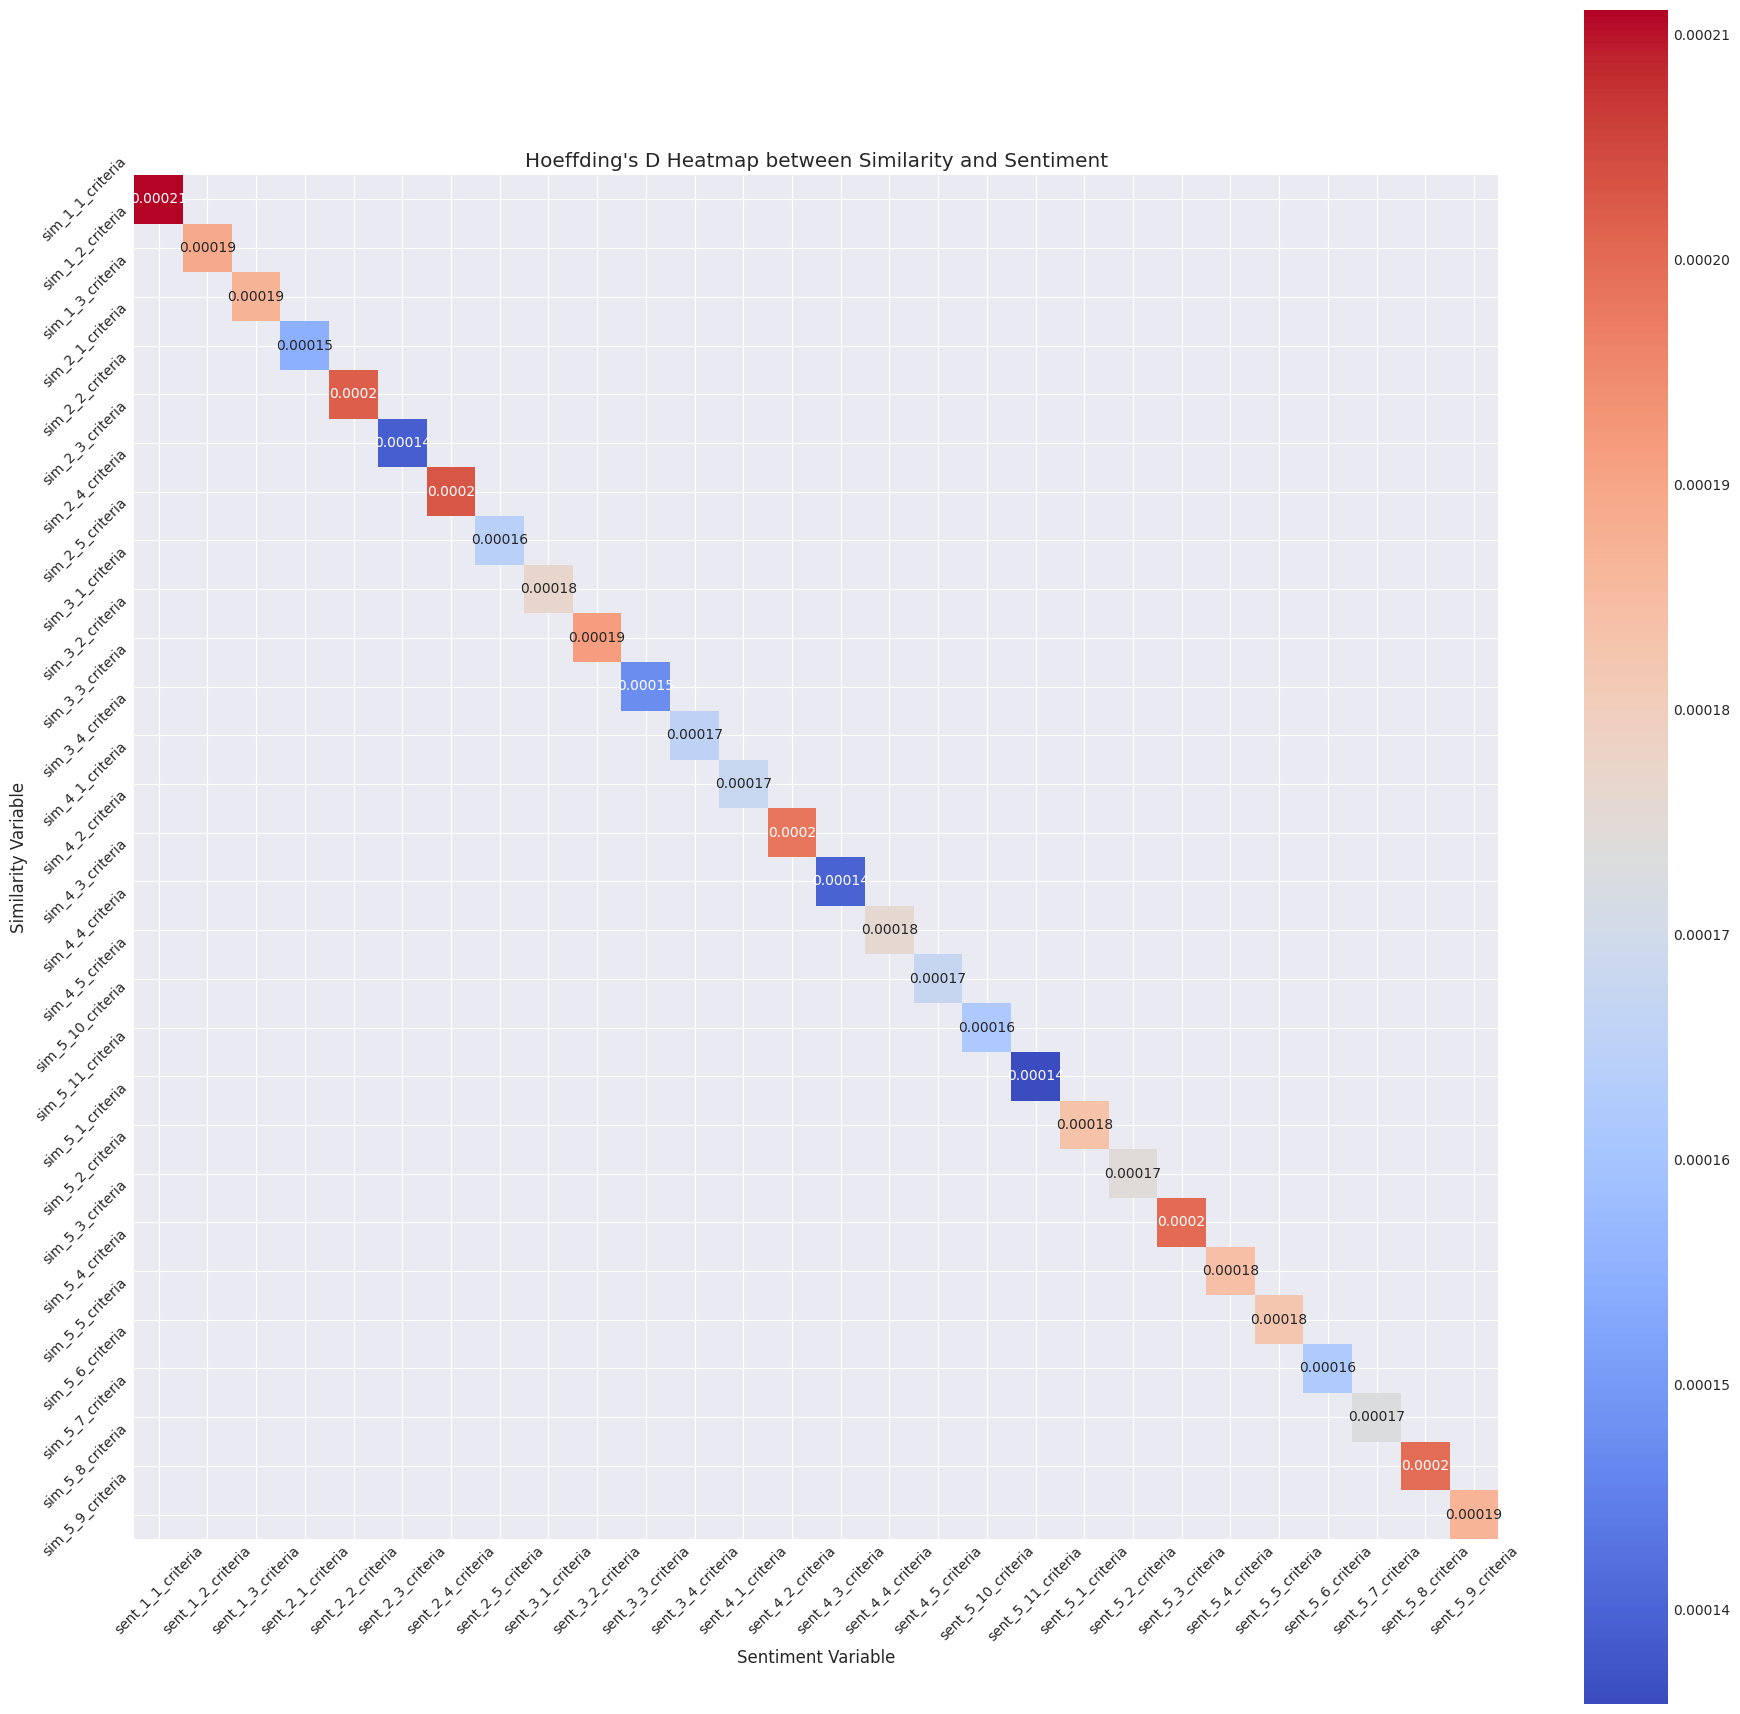

In [43]:
df_correlacoes_hoeffding_pivot = df_correlations_hoeffding.pivot(index='Similarity Variable', columns='Sentiment Variable', values='Hoeffding_D')

plt.figure(figsize=(22, 22))
sns.heatmap(df_correlacoes_hoeffding_pivot, annot=True, cmap='coolwarm', square=True)
plt.title('Hoeffding\'s D Heatmap between Similarity and Sentiment')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

As we conclude our exploratory journey through the intricate landscape of RTRS audit reports, a profound insight emerges from the application of the Maximal Information Coefficient (MIC) to our dataset. The MIC analysis has unveiled a significant non-linear correlation between the variables representing sentiment analysis and cosine similarity of TF-IDF. This revelation is both intriguing and informative, offering a nuanced understanding of the interplay between textual content and emotional undertones within these audit reports.

The significant non-linear correlations highlighted by the MIC suggest that the relationship between sentiment and similarity in these reports is far from straightforward. It implies that the sentiment captured by the BERT model, even without fine-tuning, and the textual similarity measured through TF-IDF, interact in complex ways. For instance, a high degree of textual similarity does not necessarily equate to a uniform sentiment. Conversely, diverse textual content might converge towards a common sentiment, hinting at underlying thematic consistencies that transcend mere lexical resemblance.

This complex relationship might be indicative of the multifaceted nature of audit reports, where similar terminologies and phrases can be employed to convey varied sentiments depending on context, subtleties of language, and the specific issues being addressed. The non-linear correlation captured by the MIC underscores the potential limitations of linear analytical approaches in fully grasping the dynamics of such rich textual data.

Furthermore, these findings invite a deeper introspection into the nature of audit reports. They encourage a consideration of how linguistic patterns and sentiment are interwoven, and how this tapestry of language and emotion can influence the interpretation and subsequent actions based on these reports. In essence, the significant non-linear correlations observed serve as a testament to the layered complexity inherent in audit documentation and underscore the need for sophisticated analytical tools to unravel these layers.

In summary, the application of MIC in our analysis has not only illuminated the presence of significant non-linear relationships between sentiment and similarity in RTRS audit reports but has also opened avenues for more nuanced interpretations and understandings. It challenges us to look beyond the obvious and to appreciate the intricate dance of words and emotions that play out across the pages of these reports.